<a href="https://colab.research.google.com/github/Razbolt/Neural-Network/blob/main/Neural_Network_Math_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Install the MNIST and requirements

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
pip install python-mnist -- quiet

  Using cached python_mnist-0.7-py2.py3-none-any.whl (9.6 kB)
ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet
Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist

# Using keras libraries to take MNIST dataset
(X_train, y_train,), (X_test, y_test) = mnist.load_data()

## 1.1 Data preparation

Before procesing, we need to check the MNIST Data.

As we can see the X_train data is numbered from 0 to 255. In order to use them we need to normalize them as dividing to 255 each of the value.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We also need to check the shapes before feeding them into model.

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[1].shape

(28, 28)

In [8]:
# Since we see the shapes are (6000,28,28) we need to reshape them to feed our model

X_train = X_train.reshape(60000, 784) / 255.0

X_test = X_test.reshape(10000, 784) /255.0

print(X_train.shape , X_test.shape)

(60000, 784) (10000, 784)


In [9]:
print(X_train[0].shape)

(784,)


# 2.1 Build Neural Network

In [10]:
def init_params():

  #input layer's weigths
  W1 = np.random.uniform(-0.5, 0.5, (16,784))
  b1 = np.zeros((16,1))




  #Hidden layer's weight
  W2 = np.random.uniform(-0.5,0.5, (16,16))
  b2 = np.zeros((16,1))


  # Second Hidden layer' weight
  W3 = np.random.uniform(-0.5,0.5 ,(10,16))  # Weights are still to big
  b3 = np.zeros((10,1))


  return W1,b1,W2,b2,W3,b3



W1,b1,W2,b2,W3,b3 = init_params()


## 2.2 Build Activation functions and Forward Propagation

In [11]:
def ReLU(Z):

  return np.maximum(0,Z)


def softmax(Z): # CHECK IT !!!

  # for one examples is (np.exp(Z) / np.sum( np.exp(Z)))

    Z_exp = np.exp(Z - np.max(Z, axis=0))
    sum_Z_exp = np.sum(Z_exp, axis=0)
    softmax_output = Z_exp / sum_Z_exp

    return softmax_output

def sigmoid(Z):

  return 1 / 1+ np.exp(-Z)





def forward_prop(X,W1,b1,W2,b2,W3,b3,dropout = 0.0):
  #We are assuming to have 3 layered neural network 
  #D1 and D2 are mask layers for dropout 

  D1= None
  D2=None

  # if there is no dropout layer
  if (dropout) == 0.0:
    #Forward propagation with 3 layered neural network

    #Initialize  Z
    #Since X is shape as (6000,784) and our W1 is shape as (16,784) in order to dot product we need to take Transpose of X

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2


    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

 

  else: # If there is a droput layer, we are going to build mask for each layer
    #Forward propagation with 3 layered neural network 

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)
    '''
    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
    https://www.youtube.com/watch?v=D8PJAL-MZv8
    '''
    #Create a mask for A1 as use probability of dropout from user
    D1 = np.random.rand(*A1.shape) > dropout #D1 is mask matrix that check the proability of dropout.
                                                          #If the probability is bigger than dropout, it will be 1 otherwise 0

    #Apply mask to A1
    A1 = A1 * D1
    #Normalize A1 to not to change expected value of A1 
    A1 = A1 / (1-dropout) # It scales A to not to change expected value of A1 as keeping  probability 
                          #keeeping probability means 1 - dropout probability

   
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    #Create a mask for second hidden layer as use probability of dropout from user
    D2 = np.random.rand( *A2.shape) > dropout
    A2 = A2 * D2
    A2 = A2 / (1-dropout)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

  return A1,A2,A3,D1,D2

A1,A2,A3,D1,D2 = forward_prop(X_train,W1,b1,W2,b2,W3,b3)

print(A3)






[[0.01500404 0.05363104 0.04667131 ... 0.0143118  0.02702216 0.01056243]
 [0.15155112 0.11413338 0.17878081 ... 0.27793059 0.09523603 0.29578992]
 [0.04291546 0.1660734  0.1049816  ... 0.05985431 0.10995541 0.06958951]
 ...
 [0.00810561 0.05842213 0.06729381 ... 0.02289159 0.0573601  0.02675677]
 [0.00293193 0.05473835 0.04720537 ... 0.007879   0.05444545 0.01719433]
 [0.48170369 0.12393148 0.1797272  ... 0.30842978 0.10535148 0.23981536]]


In [12]:
print(A1.shape[1])

60000


## 2.3 Back-Propagation with One-hot and derivative of activaton functions

In [13]:
def one_hot(Y): # CHECK IT !!
  num_classes = np.max(Y) + 1

  one_hot = np.zeros((Y.size,num_classes))
  one_hot[np.arange(Y.size), Y] = 1

  return one_hot.T

def derivative_ReLU(Z):
  #Do we need to check between 0-1 ?
  return Z > 0

#Focus on backpropagation !!! Check how its works ! 
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1, D2, dropout = 0.0): # CHECK IT !!!!

  m = Y.size
  Y = one_hot(Y)
  #if droput is not used

  if (dropout) == 0.0:
    
    #One hot encoded to see each labels in matrix as 1
    

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)

  else: #If droput is used

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    #Dropout mask for second hidden layer
    dA2 = dA2 * (D2)
    #dA2 = D2 / dropout

    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    #Dropout mask for first hidden layer
    dA1 = dA1 * (D1)
    #dA1 = D1 / dropout

    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)
    

  return dW1,dB1,dW2,dB2,dW3,dB3

## 2.4 Update the Gradient

In [14]:
learning_rate = 0.1
epochs =  200

def update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate):

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1,b1,W2,b2,W3,b3


## 2.5 Try in given epochs time to see the changes

In [15]:
def accuracy_score(A,Y):
    size = Y.size
    predict = np.argmax(A,0)

    correct = np.sum(predict == Y)

    accuracy = correct / size

    return accuracy


#print(predictions.max)
#print(y_train)
#print(np.sum(y_train == predictions))
#print(y_train.size)


In [16]:
dropout = 0.1
for epoch in range(epochs):
   # Forward propagation
   A1, A2, A3,D1,D2 = forward_prop(X_train, W1, b1, W2, b2, W3, b3,dropout=dropout)

   #Backward propagation
   dW1, db1, dW2, db2, dW3, db3 = backward_prop(X_train, y_train, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1,D2,dropout=dropout)

   #Updating gradients
   W1,b1,W2,b2,W3,b3 = update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate)



   if epoch % 100 == 0:
    acc =accuracy_score(A3,y_train)
    print(f'The accuracy in epoch {epoch} is {acc}')


The accuracy in epoch 0 is 0.10631666666666667
The accuracy in epoch 100 is 0.4109333333333333


# Full Connected Class Version 

Hey Greg Please check this part! 

I havent updated with comments because most of them written in above 

  Missing parts



- part d)

    1. update rule
    2. decay
    3. L1 OR L2 regularizator


Optimizer is done! 

May need to check how these gonna change the functions: train, forward and backward prop


In [101]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size,activation_function,dropout):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function
        self.dropout = dropout

        self.W1 = np.random.uniform(-0.5,0.5,(hidden_size,input_size))
        self.b1 = np.zeros((hidden_size,1))

        self.W2 = np.random.uniform(-0.5,0.5,(hidden_size,hidden_size))
        self.b2 = np.zeros((hidden_size,1))

        self.W3 = np.random.uniform(-0.5,0.5,(output_size,hidden_size))
        self.b3 = np.zeros((output_size,1))
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
    

    
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
    
    
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true

        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
    
    
    def forward_prop(self,X,dropout):
        D1 = None
        D2 = None
        #Forward propagation with 3 layered neural network
        
        if dropout == 0.0: # If there is no dropout layer
            Z1 = self.W1.dot(X.T) + self.b1
            A1 = self.activation(Z1)

            Z2 = self.W2.dot(A1) + self.b2
            A2 = self.activation(Z2)

            Z3 = self.W3.dot(A2) + self.b3
            A3 = self.softmax(Z3)
        else:              # If there is a dropout layer 
            """ This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course"""
            """ https://www.youtube.com/watch?v=D8PJAL-MZv8 """

            # Create a mask for A1 as use probability of dropout from user
            Z1 = self.W1.dot(X.T) + self.b1 
            A1 = self.activation(Z1)
    
            D1 = np.random.rand(*A1.shape) > dropout # D1 is mask matrix that check the proability of dropout.
            A1 = A1 * D1                           # If the probability is bigger than dropout, it will be 1 otherwise 0
            A1 = A1 / (1 - dropout)                # It scales A to not to change expected value of A1 as keeping  probability

            Z2 = self.W2.dot(A1) + self.b2
            A2 = self.activation(Z2)

            D2 = np.random.rand(*A2.shape) > dropout
            A2 = A2 * D2
            A2 = A2 / (1 - dropout)

            Z3 = self.W3.dot(A2) + self.b3 
            A3 = self.softmax(Z3) # At the end softmax  the output layer to have a probabilistic values
        
        return A1,A2,A3,D1,D2
    
    def backward_prop(self,X,Y,A1,A2,A3,D1,D2,dropout):
        m = Y.size
        Y = self.one_hot(Y)
        
        # Derivate of cost function with respect to z3
        dZ3 = A3 - Y
        dW3 = (1/m) * dZ3.dot(A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        # Derivate for second hidden layer
        dA2 = np.dot(self.W3.T, dZ3)
        if dropout > 0:
            dA2 = dA2 * D2  # Apply dropout
        dZ2 = dA2 * self.derivative_activation(A2)
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Derivate for first hidden layer
        dA1 = np.dot(self.W2.T, dZ2)
        if dropout > 0:
            dA1 = dA1 * D1  # Apply dropout
        dZ1 = dA1 * self.derivative_activation(A1)
        dW1 = (1/m) * dZ1.dot(X)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Store the gradients
        self.dW1 = dW1
        self.db1 = db1
        self.dW2 = dW2
        self.db2 = db2
        self.dW3 = dW3
        self.db3 = db3

    def update_gradient(self,learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W3 -= learning_rate * self.dW3
        self.b3 -= learning_rate * self.db3


    def train(self,X,Y,learning_rate,epochs,batch_size): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, wehere each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        for epoch in range(epochs):
            epoch_loss = 0

            #Shuffle the dataset at the start of each epoc
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the the dataset into mini-bathces  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                A1, A2, A3, D1, D2 = self.forward_prop(X_batch, self.dropout)

                # Calculate the loss and store it
                loss = self.calculate_loss(A3, Y_batch)
                epoch_loss += loss


                # Backward propagation
                self.backward_prop(X_batch, Y_batch, A1, A2, A3, D1, D2, self.dropout)

                # Updating gradients
                self.update_gradient(learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'The loss in epoch {epoch} is : {average_epoch_loss:.5f}')
        return losses
            

    def predict(self,X):
        A1, A2, A3, D1, D2 = self.forward_prop(X, dropout=0.0)
        return np.argmax(A3, axis=0)

    def accuracy_score(self,X,Y):
        size = Y.size
        predict = self.predict(X)
        correct = np.sum(predict == Y)
        accuracy = correct / size
        return accuracy

    def test(self,X,Y):
        accuracy = self.accuracy_score(X,Y)
        print(f'The accuracy is: {accuracy*100}')
        

    


        

    
    

# Example

In [125]:
# Create a neural network object
nn = MyNeuralNetwork(input_size=784, hidden_size=35, output_size=10, activation_function='relu',dropout=0.1)

# Train the neural network
losses = nn.train(X_train, y_train, learning_rate=0.1, epochs=50, batch_size=36)




The loss in epoch 0 is : 1.06053
The loss in epoch 1 is : 0.63389
The loss in epoch 2 is : 0.52607
The loss in epoch 3 is : 0.46748
The loss in epoch 4 is : 0.42829
The loss in epoch 5 is : 0.40069
The loss in epoch 6 is : 0.37589
The loss in epoch 7 is : 0.35657
The loss in epoch 8 is : 0.33846
The loss in epoch 9 is : 0.32522
The loss in epoch 10 is : 0.31306
The loss in epoch 11 is : 0.30304
The loss in epoch 12 is : 0.29481
The loss in epoch 13 is : 0.28919
The loss in epoch 14 is : 0.28215
The loss in epoch 15 is : 0.27888
The loss in epoch 16 is : 0.26884
The loss in epoch 17 is : 0.26656
The loss in epoch 18 is : 0.25516
The loss in epoch 19 is : 0.25544
The loss in epoch 20 is : 0.25428
The loss in epoch 21 is : 0.24973
The loss in epoch 22 is : 0.24339
The loss in epoch 23 is : 0.23420
The loss in epoch 24 is : 0.23950
The loss in epoch 25 is : 0.23308
The loss in epoch 26 is : 0.23108
The loss in epoch 27 is : 0.22395
The loss in epoch 28 is : 0.22501
The loss in epoch 29 is 

In [128]:
# Test the neural network
nn.test(X_test, y_test)


The accuracy is: 96.76


In [129]:
len(losses)

50

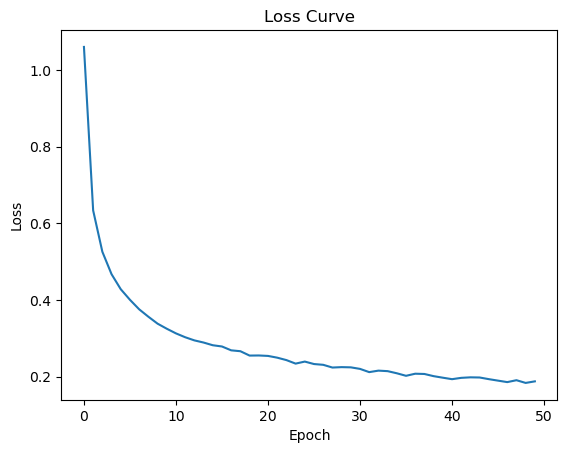

In [130]:
import matplotlib.pyplot as plt

#Plot the loss curve


plt.plot(losses)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
